In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
 

In [2]:
costumers_dataset = pd.read_csv("Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
costumers_dataset.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6671,5090-EMGTC,Female,0,Yes,No,59,Yes,No,Fiber optic,No,...,No,Yes,Yes,Yes,Two year,Yes,Mailed check,100.05,6034.85,No
4664,7571-YXDAD,Female,0,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Credit card (automatic),74.90,147.15,Yes
4662,4018-KJYUY,Male,0,No,Yes,22,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.15,432.5,No
1663,5364-XYIRR,Male,0,Yes,No,51,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.65,4812.75,Yes
1235,1543-LLLFT,Male,1,Yes,No,61,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,No,One year,Yes,Mailed check,98.30,6066.55,No


In [3]:
costumers_dataset.drop("customerID", axis = 'columns', inplace = True)


In [4]:
costumers_dataset.TotalCharges.values # should be numeric
costumers_dataset.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [5]:
pd.to_numeric(costumers_dataset.TotalCharges, errors="coerce").isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [6]:
costumers_dataset[pd.to_numeric(costumers_dataset.TotalCharges, errors="coerce").isnull()].shape

(11, 20)

In [7]:
costumers_dataset.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [8]:
costumers_dataset1 = costumers_dataset[costumers_dataset.TotalCharges != ' ']
costumers_dataset1.shape

(7032, 20)

In [9]:
costumers_dataset1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
costumers_dataset1.TotalCharges = pd.to_numeric(costumers_dataset1.TotalCharges)

/tmp/ipykernel_52685/2018148266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  costumers_dataset1.TotalCharges = pd.to_numeric(costumers_dataset1.TotalCharges)


In [11]:
costumers_dataset1.TotalCharges.dtype

dtype('float64')

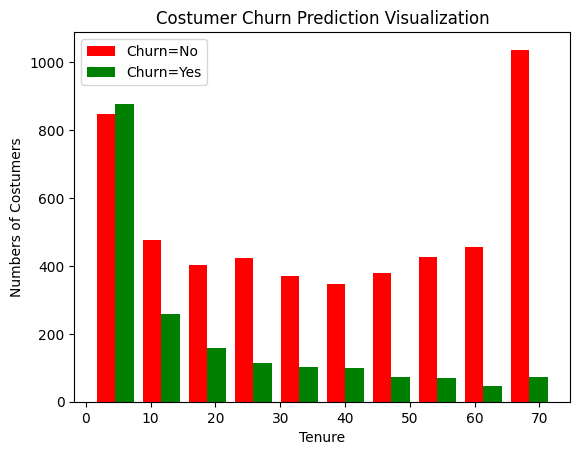

In [12]:
tenure_churn_no = costumers_dataset1[costumers_dataset1.Churn=='No'].tenure
tenure_churn_yes = costumers_dataset1[costumers_dataset1.Churn=='Yes'].tenure
plt.hist([tenure_churn_no,tenure_churn_yes], color=['red', 'green'],label=['Churn=No', 'Churn=Yes'])
plt.xlabel("Tenure")
plt.ylabel("Numbers of Costumers")
plt.title('Costumer Churn Prediction Visualization')
plt.legend()

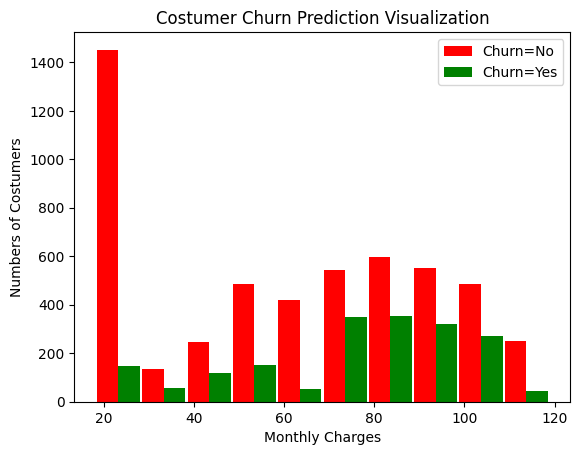

In [13]:
mc_churn_no = costumers_dataset1[costumers_dataset1.Churn=='No'].MonthlyCharges
mc_churn_yes = costumers_dataset1[costumers_dataset1.Churn=='Yes'].MonthlyCharges
plt.hist([mc_churn_no,mc_churn_yes], rwidth=.95, color=['red', 'green'],label=['Churn=No', 'Churn=Yes'])

plt.xlabel("Monthly Charges")
plt.ylabel("Numbers of Costumers")
plt.title('Costumer Churn Prediction Visualization')
plt.legend()

In [14]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [15]:
print_unique_col_values(costumers_dataset1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [16]:
costumers_dataset1.replace('No internet service', 'No', inplace=True)
costumers_dataset1.replace('No phone service', 'No', inplace=True)

/tmp/ipykernel_52685/4056208816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  costumers_dataset1.replace('No internet service', 'No', inplace=True)
/tmp/ipykernel_52685/4056208816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  costumers_dataset1.replace('No phone service', 'No', inplace=True)


In [17]:
print_unique_col_values(costumers_dataset1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [18]:
yes_no_cols = ["Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "Churn"]

for col in yes_no_cols:
    costumers_dataset1[col].replace('Yes', 1, inplace = True)
    costumers_dataset1[col].replace('No', 0, inplace = True)

/tmp/ipykernel_52685/313109065.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  costumers_dataset1[col].replace('Yes', 1, inplace = True)
/tmp/ipykernel_52685/313109065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  costumers_dataset1[col].replace('No', 0, inplace = True)


In [19]:
costumers_dataset1['gender'].replace({'Female': 1, 'Male':0}, inplace = True)

/tmp/ipykernel_52685/728109111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  costumers_dataset1['gender'].replace({'Female': 1, 'Male':0}, inplace = True)


In [20]:
costumers_dataset1.Partner = pd.to_numeric(costumers_dataset1.Partner)

/tmp/ipykernel_52685/3945134557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  costumers_dataset1.Partner = pd.to_numeric(costumers_dataset1.Partner)


In [21]:
print_unique_col_values(costumers_dataset1)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [22]:
costumers_dataset1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5224,1,1,0,0,45,1,1,Fiber optic,0,0,1,0,1,1,One year,1,Bank transfer (automatic),100.15,4459.80,0
5256,0,0,1,1,52,1,1,Fiber optic,0,0,1,1,0,1,Two year,1,Bank transfer (automatic),96.25,4990.25,1
3420,1,0,0,0,26,1,1,DSL,1,1,0,0,1,0,Month-to-month,1,Bank transfer (automatic),69.50,1800.05,0
2719,1,1,1,1,56,1,0,DSL,1,0,0,1,1,1,Two year,1,Credit card (automatic),72.60,4084.35,0
6381,0,0,0,1,1,1,0,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,19.55,19.55,0


In [23]:
costumers_dataset1['gender'].unique()

array([1, 0])

In [27]:
final_costumer_dataset = pd.get_dummies(data=costumers_dataset1, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [29]:
final_costumer_dataset.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [30]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

final_costumer_dataset[cols_to_scale] = scaler.fit_transform(final_costumer_dataset[cols_to_scale])

In [35]:
X = final_costumer_dataset.drop('Churn', axis='columns')
y = final_costumer_dataset['Churn']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 5)

In [42]:
correlation_matrix = final_costumer_dataset.corr()
print(correlation_matrix)

                                           gender  SeniorCitizen   Partner  \
gender                                   1.000000       0.001819  0.001379   
SeniorCitizen                            0.001819       1.000000  0.016957   
Partner                                  0.001379       0.016957  1.000000   
Dependents                              -0.010349      -0.210550  0.452269   
tenure                                  -0.005285       0.015683  0.381912   
PhoneService                             0.007515       0.008392  0.018397   
MultipleLines                            0.008883       0.142996  0.142561   
OnlineSecurity                           0.016328      -0.038576  0.143346   
OnlineBackup                             0.013093       0.066663  0.141849   
DeviceProtection                         0.000807       0.059514  0.153556   
TechSupport                              0.008507      -0.060577  0.120206   
StreamingTV                              0.007124       0.105445

In [47]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


# Create the CNN model
model = models.Sequential([
    layers.Dense(20,input_shape = (26,), activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
model.fit(X_train, y_train, epochs=100)


Epoch 1/100
176/176 [==============================] - 3s 4ms/step - loss: 0.5021 - accuracy: 0.7420
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4299 - accuracy: 0.7916
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4205 - accuracy: 0.7970
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4178 - accuracy: 0.7998
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4150 - accuracy: 0.8021
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4132 - accuracy: 0.8062
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4116 - accuracy: 0.8055
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4113 - accuracy: 0.8055
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4099 - accuracy: 0.8069
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4092 - accura

In [49]:
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4454 - accuracy: 0.7982


[0.44541135430336, 0.7981520891189575]

In [51]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 3ms/step


array([[0.27131894],
       [0.46052215],
       [0.02690831],
       [0.8020707 ],
       [0.54480416]], dtype=float32)

In [52]:
pred_y = []
for element in yp:
    if element > .5:
        pred_y.append(1)
    else:
        pred_y.append(0)
        

In [55]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       999
         1.0       0.68      0.57      0.62       408

    accuracy                           0.80      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.79      0.80      0.79      1407



Text(50.722222222222214, 0.5, 'Truth')

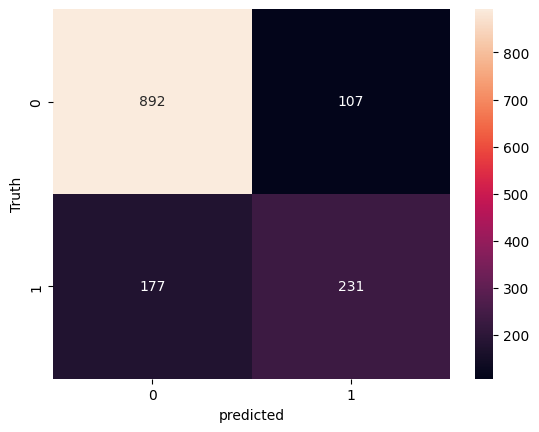

In [54]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=pred_y)

plt.Figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')